In [1]:
import numpy as np
from gtda.homology import CubicalPersistence


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [8]:
data = mnist.data.to_numpy()

In [9]:
type(data)

numpy.ndarray

In [13]:
data = data/255.0

In [17]:
sample = data[0:5000]

In [27]:
sample = sample.reshape(-1,28,28)

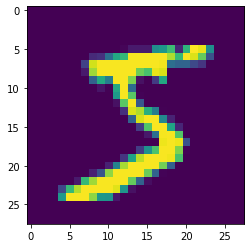

In [28]:
import matplotlib.pyplot as plt

plt.imshow(sample[0])

In [29]:
sample = -1* sample

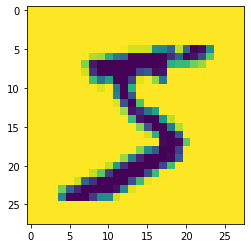

In [30]:
plt.imshow(sample[0])

In [31]:
PD = CubicalPersistence().fit_transform(sample)


In [33]:
PD.shape

(5000, 77, 3)

In [42]:
from gtda.plotting import plot_diagram

plot_diagram(PD[4])

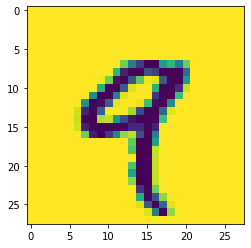

In [41]:
plt.imshow(sample[4])

In [43]:
from gtda.diagrams import PersistenceImage

PI = PersistenceImage().fit_transform(PD)

In [45]:
PI.shape

(5000, 2, 100, 100)

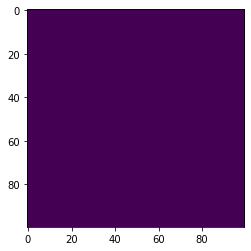

In [82]:
plt.imshow(PI[11][1])

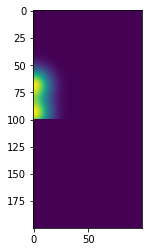

In [57]:
plt.imshow(PI.reshape(-1,200,100)[0])

In [58]:
stacked_PI = PI.reshape(-1,200,100)

In [117]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3).fit_transform(stacked_PI[2])

/Users/shlee/miniforge3/envs/torch19/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).

/Users/shlee/miniforge3/envs/torch19/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



In [118]:
nmf.shape

(200, 3)

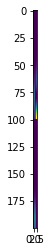

In [119]:
plt.imshow(nmf)

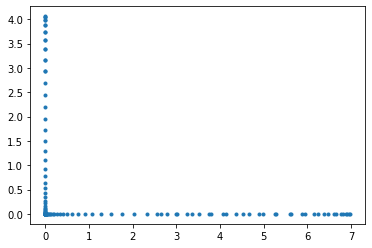

In [120]:
plt.plot(nmf[:,0],nmf[:,1],'.')

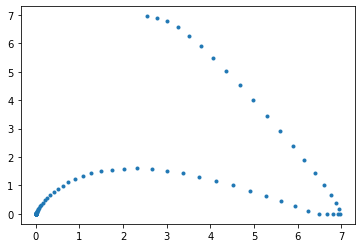

In [121]:
plt.plot(nmf[:,0],nmf[:,2],'.')

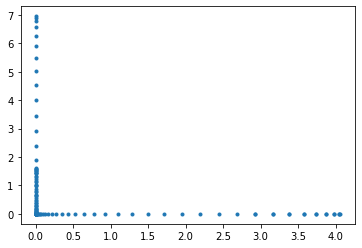

In [122]:
plt.plot(nmf[:,1],nmf[:,2],'.')

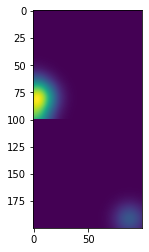

In [110]:
plt.imshow(stacked_PI[2])

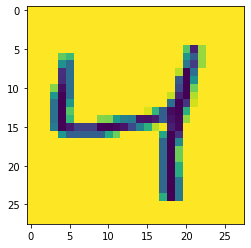

In [111]:
plt.imshow(sample[2])

In [112]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(nmf)